In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data.info()
customer_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
customer_data = customer_data.drop('CustomerID', axis=1)
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
encoder = OneHotEncoder(drop='first', sparse_output= False)
gender = encoder.fit_transform(customer_data[['Gender']])
gender = pd.DataFrame(gender, columns=['Sex'])
customer_data = pd.concat([customer_data, gender], axis=1)
customer_data = customer_data.drop('Gender', axis=1)
customer_data

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0
...,...,...,...,...
195,35,120,79,0.0
196,45,126,28,0.0
197,32,126,74,1.0
198,32,137,18,1.0


Male is encoded as 1.0 and Female is encoded as 0.0

In [5]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_unscaled = customer_data[numerical_columns].drop('Age', axis=1)
scaler =  StandardScaler()
customer_data[numerical_columns] = scaler.fit_transform(customer_data[numerical_columns])
customer_data

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,-1.424569,-1.738999,-0.434801,1.0
1,-1.281035,-1.738999,1.195704,1.0
2,-1.352802,-1.700830,-1.715913,0.0
3,-1.137502,-1.700830,1.040418,0.0
4,-0.563369,-1.662660,-0.395980,0.0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.0
196,0.441365,2.497807,-0.861839,0.0
197,-0.491602,2.497807,0.923953,1.0
198,-0.491602,2.917671,-1.250054,1.0


In [6]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
wcss = []
for k in range(1, 16):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=12)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


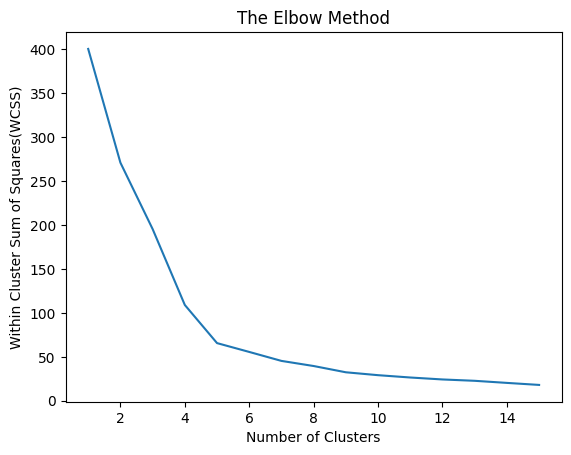

In [8]:
plt.plot(range(1,16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()

In [9]:
optimal_clusters = 5
best_kmeans = KMeans(n_clusters= optimal_clusters, init='k-means++', random_state=12)
best_kmeans.fit(X)

KMeans(n_clusters=5, random_state=12)

In [10]:
kmeans_labels = best_kmeans.labels_

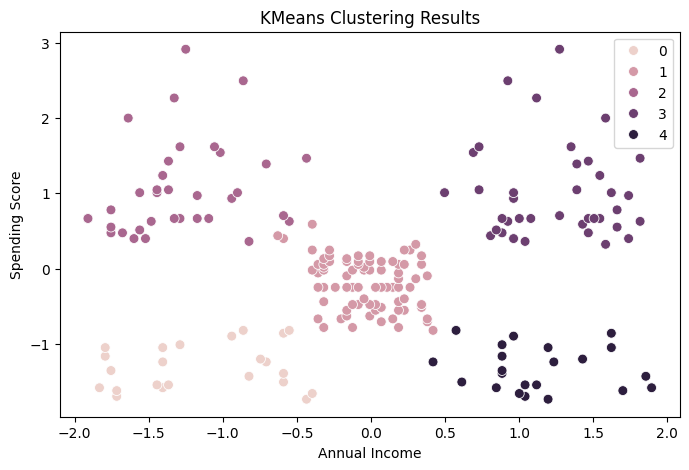

In [11]:
plt.figure(figsize=(8,5))
scatter = sns.scatterplot(x=customer_data['Spending Score (1-100)'], y=customer_data['Annual Income (k$)'], hue=kmeans_labels, s=50,legend='full')
plt.title('KMeans Clustering Results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

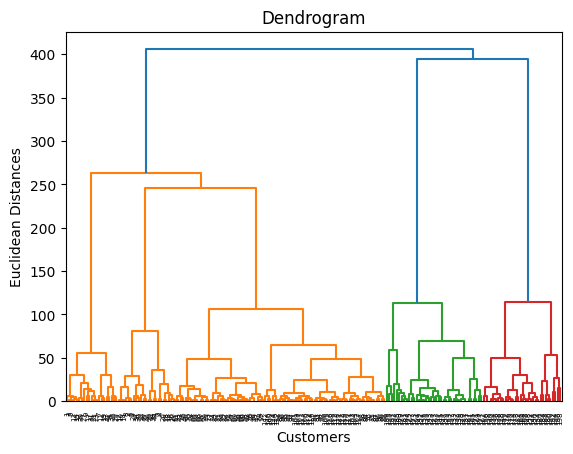

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X_unscaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

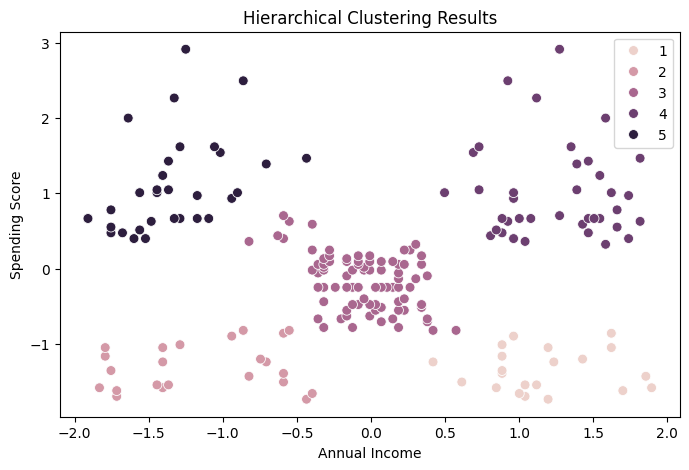

In [13]:
hierarchical_labels = sch.fcluster(sch.linkage(X_unscaled, method='ward'), 5, criterion='maxclust')
plt.figure(figsize=(8,5))
scatter = sns.scatterplot(x=customer_data['Spending Score (1-100)'], y=customer_data['Annual Income (k$)'], hue=hierarchical_labels, s=50, legend='full')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [14]:
comparison = pd.DataFrame({'K-Means': kmeans_labels, 'Hierarchical': hierarchical_labels})
comparison

,K-Means,Hierarchical
0,0,2
1,4,1
2,0,2
3,4,1
4,0,2
...,...,...
195,3,4
196,2,5
197,3,4
198,2,5


In [15]:
kmeans_silh_score = silhouette_score(X, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silh_score}')

hierarchical_silh_score = silhouette_score(X, hierarchical_labels)
print(f'Hierarchical Silhouette Score: {hierarchical_silh_score}')

K-Means Silhouette Score: 0.5546571631111091
Hierarchical Silhouette Score: 0.5538089226688662


# Report
The features used for the two tables below are Age, Annual Income and Spending Score.

|Number of Clusters (Hierarchical) | Normalisation| Silhouette Score|
|----------------------|-------------------|-----------------------|
|4|No|0.4104|
|6|No|0.4431|
|8|No|0.4102|
|4|Yes|0.3615|
|6|Yes|0.4201|
|8|Yes|0.4102|

|Number of Clusters (K-Means) | Normalisation| Silhouette Score|
|----------------------|-------------------|-----------------------|
|4|No|0.3924|
|6|No|0.4103|
|8|No|0.3961|
|4|Yes|0.4040|
|6|Yes|0.4311|
|8|Yes|0.4318|

**The hierarchical clustering performs better on unscaled data while K-Means performs better on scaled and normalised data.**

The **optimal number of clusters** based on the Dendrogram and the Elbow method is **5**.

Using 5 clusters and dropping the Age and Sex columns **(Age and Sex columns decreases Silhouette score)**:

K-means clustering Silhouette Score: 0.5547.

Hierarchical Cluatering Silhouette score: 0.5538

